In [45]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tiff

In [46]:
# Load the multi-layer TIFF file
multi_layer_image = tiff.imread('bibo.tif')

# Split the multi-layer TIFF into individual images
background_image = multi_layer_image[2]
imaging_beam_image = multi_layer_image[1]
absorption_image = multi_layer_image[0]

In [47]:
# Constants
image_size = background_image.shape
absorption_coefficient = 0.02
S=image_size[0]*image_size[0]
sigma=2*10e-13

# Calculate the optical density
# optical_density = -S/sigma *np.log((absorption_image-background_image) / (imaging_beam_image-background_image))
optical_density = -S/sigma *np.log((absorption_image) / (imaging_beam_image))

# Subtract the background
optical_density -= background_image

# Define pixel size and atom mass (customize these values)
pixel_size = 13  # micrometers per pixel
atom_mass = 1.67*88e-27  # mass of a single atom (in kilograms)

# Calculate the number of atoms in the cloud
cloud_density = optical_density*optical_density / (absorption_coefficient * pixel_size)
number_of_atoms = np.sum(cloud_density) * atom_mass

TypeError: ufunc 'bitwise_xor' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

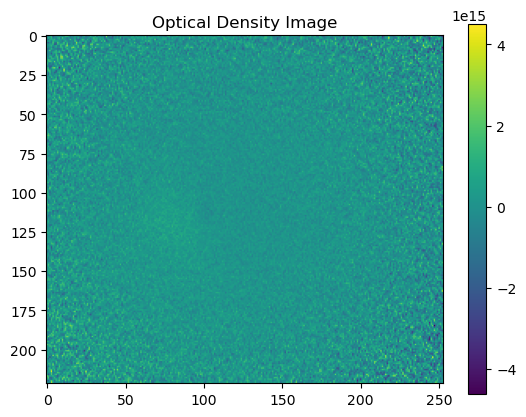

Number of atoms in the cloud: 4.47e-06


In [ ]:
# Plot the optical density
plt.imshow(optical_density, cmap='viridis')
plt.colorbar()
plt.title('Optical Density Image')
plt.show()

print(f"Number of atoms in the cloud: {number_of_atoms:.2e}")